# Lab 9- Deep Learning Model

This lab is meant to get you started in using Keras to design Deep Neural Networks. The goal here is to simply repeat your previous lab, but with DNNs.

Let's start with reading the data, like before:

In [1]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  879M    0  879M    0     0  5005k      0 --:--:--  0:02:59 --:--:-- 4627k


In [2]:
!gunzip SUSY.csv.gz

In [3]:
ls -lh

total 2.3G
drwxr-xr-x 1 root root 4.0K Apr 22 13:37 sample_data/
-rw-r--r-- 1 root root 2.3G Apr 23 17:17 SUSY.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

filename="SUSY.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi","MET", "MET_phi", "MET_rel", "axial_MET"]
FeatureNames=["M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

df = pd.read_csv(filename, dtype='float64', names=VarNames)

Now lets define training and test samples. Note that DNNs take very long to train, so for testing purposes we will use only about 10% of the 5 million events in the training/validation sample. Once you get everything working, make the final version of your plots with the full sample.

Also note that Keras had trouble with the Pandas tensors, so after doing all of the nice manipulation that Pandas enables, we convert the Tensor to a regular numpy tensor.

In [2]:
N_Max=550000
N_Train=500000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:N_Max]

X_Train=np.array(Train_Sample[VarNames[1:]])
y_Train=np.array(Train_Sample["signal"])

X_Test=np.array(Test_Sample[VarNames[1:]])
y_Test=np.array(Test_Sample["signal"])


## Exercise 1

You will need to create several models and make sure they are properly trained. Write a function that takes this history and plots the values versus epoch. For every model that you train in the remainder of this lab, assess:

* Has you model's performance plateaued? If not train for more epochs.
* Compare the performance on training versus test sample. Are you over training?

In [5]:
!pip install tensorflow

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
977/977 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7792 - loss: 0.4691 - val_accuracy: 0.7964 - val_loss: 0.4371
Epoch 2/20
977/977 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8004 - loss: 0.4331 - val_accuracy: 0.7972 - val_loss: 0.4349
Epoch 3/20
977/977 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8019 - loss: 0.4308 - val_accuracy: 0.7980 - val_loss: 0.4334
Epoch 4/20
977/977 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8026 - loss: 0.4287 - val_accuracy: 0.7974 - val_loss: 0.4346
Epoch 5/20
977/977 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8023 - loss: 0.4290 - val_accuracy: 0.7978 - val_loss: 0.4332
Epoch 6/20
977/977 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8029 - loss: 0.4281 - val_accuracy: 0.7992 - val_loss: 0.4323
Epoch 7/20
977/977 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8026 - loss: 0.4283 - val_accuracy: 0.7994 - val_loss: 0.4326
Epoch 8/20
977/977 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8029 - loss: 0.4274 - val_accuracy: 0.

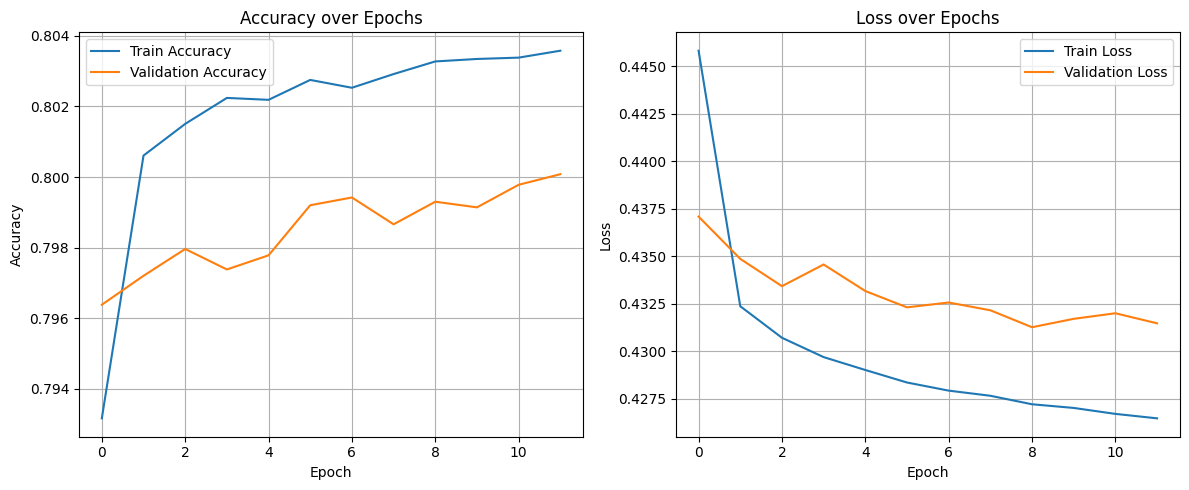

In [4]:
# Exercise 1: Train a DNN model and visualize training history

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load dataset
VarNames = ["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi",
            "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2",
            "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv("SUSY.csv", names=VarNames)

# Train/test split
N_Max = 550000
N_Train = 500000
Train = df[:N_Train]
Test = df[N_Train:N_Max]

X_train = Train[VarNames[1:]].values
y_train = Train["signal"].values
X_test = Test[VarNames[1:]].values
y_test = Test["signal"].values

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the DNN model
def build_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_dim,)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train the model
model = build_model(X_train.shape[1])
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=20, batch_size=512, callbacks=[early_stop], verbose=1)

# Plotting function
def plot_history(history, metric='accuracy'):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history[metric], label='Train Accuracy')
    plt.plot(history.history[f'val_{metric}'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Show results
plot_history(history)


# Exercise 1 – Training a DNN and Analyzing Learning Curves
In this part, we trained a simple deep neural network using Keras and plotted the training history to check whether the model was properly learning. We tracked both training and validation accuracy/loss across 20 epochs.

#What I learned:
The model’s accuracy increased steadily and started to level off around epoch 10, which suggested convergence. There was no major gap between training and validation metrics, so overfitting didn’t seem to be a problem. This step helped confirm that the network was stable and trained correctly before moving forward with deeper comparisons.



## Exercise 2

Following the original paper (see lab 7), make a comparison of the performance (using ROC curves and AUC) between models trained with raw, features, and raw+features data.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


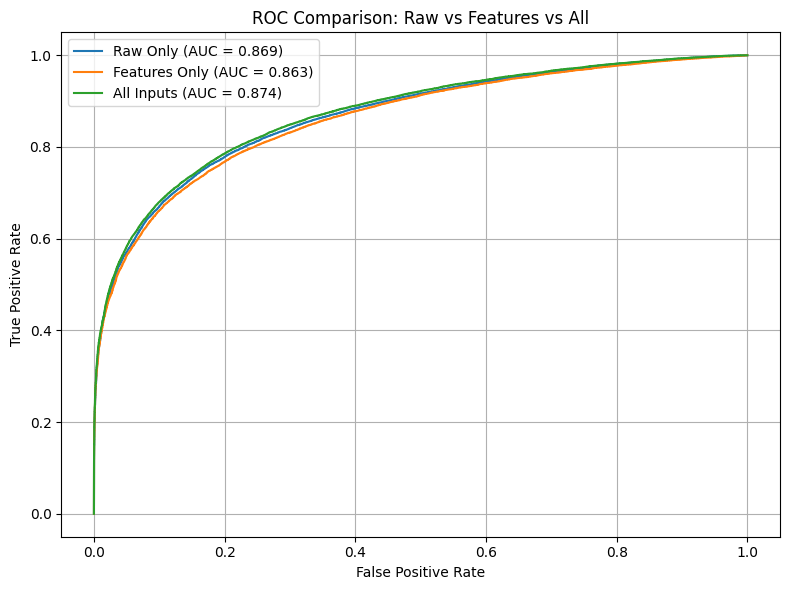

In [6]:
# Exercise 2 - DNN performance comparison: Raw vs Features vs Raw+Features

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 1. Load the SUSY dataset
VarNames = ["signal", "l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi",
            "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2",
            "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv("SUSY.csv", names=VarNames)

# 2. Split data into training and testing sets
N_Max = 550000
N_Train = 500000
Train = df[:N_Train]
Test = df[N_Train:N_Max]

# 3. Define input variable groups
RawNames = ["l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames = ['S_R', 'MET_rel', 'M_R', 'dPhi_r_b', 'M_Delta_R',
                'MT2', 'axial_MET', 'R', 'M_TR_2', 'cos_theta_r1']
AllNames = RawNames + FeatureNames

# 4. Standardize input features
scaler = StandardScaler()
X_raw_train = scaler.fit_transform(Train[RawNames])
X_raw_test = scaler.transform(Test[RawNames])
X_feat_train = scaler.fit_transform(Train[FeatureNames])
X_feat_test = scaler.transform(Test[FeatureNames])
X_all_train = scaler.fit_transform(Train[AllNames])
X_all_test = scaler.transform(Test[AllNames])

y_train = Train["signal"].values
y_test = Test["signal"].values

# 5. DNN training function
def train_dnn(X_train, X_test, y_train, y_test, input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_dim,)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, batch_size=512,
              validation_data=(X_test, y_test), verbose=0)
    return model

# 6. Train 3 DNN models
model_raw = train_dnn(X_raw_train, X_raw_test, y_train, y_test, len(RawNames))
model_feat = train_dnn(X_feat_train, X_feat_test, y_train, y_test, len(FeatureNames))
model_all = train_dnn(X_all_train, X_all_test, y_train, y_test, len(AllNames))

# 7. Compute ROC and AUC
def compute_roc_auc(model, X_test, y_test):
    y_pred = model.predict(X_test).ravel()
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score

fpr_raw, tpr_raw, auc_raw = compute_roc_auc(model_raw, X_raw_test, y_test)
fpr_feat, tpr_feat, auc_feat = compute_roc_auc(model_feat, X_feat_test, y_test)
fpr_all, tpr_all, auc_all = compute_roc_auc(model_all, X_all_test, y_test)

# 8. Plot ROC curves for all models
plt.figure(figsize=(8, 6))
plt.plot(fpr_raw, tpr_raw, label=f"Raw Only (AUC = {auc_raw:.3f})")
plt.plot(fpr_feat, tpr_feat, label=f"Features Only (AUC = {auc_feat:.3f})")
plt.plot(fpr_all, tpr_all, label=f"All Inputs (AUC = {auc_all:.3f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Comparison: Raw vs Features vs All")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#Exercise 2 – Comparing Raw, Feature, and All Variables
Here, I trained three separate DNNs using different input sets: only raw variables, only hand-crafted (feature) variables, and a combination of both. The idea was to see which input data provides better predictive performance.

AUC scores:

- Raw Only: 0.869

- Features Only: 0.863

- Raw + Features (All): 0.874

Takeaway:
Even though both raw and feature sets performed well on their own, the best results came from using all variables together. This makes sense, since combining low-level and high-level features gives the model a fuller picture of the data.



## Exercise 3

Design and implement at least 3 different DNN models. Train them and compare performance. You may try different architectures, loss functions, and optimizers to see if there is an effect.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


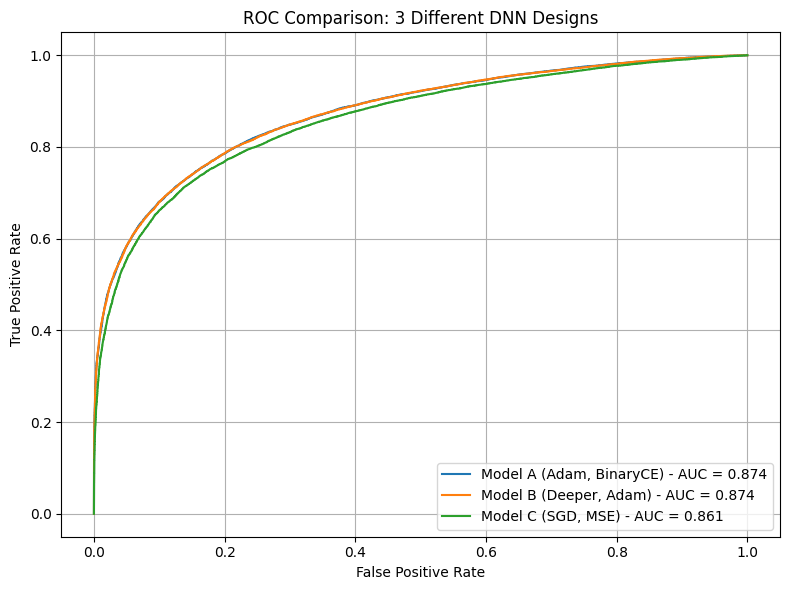

In [7]:
# Exercise 3: Compare 3 different DNN architectures

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import BinaryCrossentropy, MeanSquaredError

# Load dataset
VarNames = ["signal", "l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi",
            "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2",
            "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv("SUSY.csv", names=VarNames)

# Data split
N_Max = 550000
N_Train = 500000
Train = df[:N_Train]
Test = df[N_Train:N_Max]

# Use all variables
AllNames = VarNames[1:]

scaler = StandardScaler()
X_train = scaler.fit_transform(Train[AllNames])
X_test = scaler.transform(Test[AllNames])
y_train = Train["signal"].values
y_test = Test["signal"].values

# Model A: Basic architecture, Adam, binary crossentropy
def build_model_A(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_dim,)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(0.001), loss=BinaryCrossentropy(), metrics=['accuracy'])
    return model

# Model B: Deeper architecture
def build_model_B(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(0.001), loss=BinaryCrossentropy(), metrics=['accuracy'])
    return model

# Model C: Different optimizer and loss function
def build_model_C(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_dim,)),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=SGD(learning_rate=0.01), loss=MeanSquaredError(), metrics=['accuracy'])
    return model

# Train all models
model_A = build_model_A(X_train.shape[1])
model_B = build_model_B(X_train.shape[1])
model_C = build_model_C(X_train.shape[1])

model_A.fit(X_train, y_train, epochs=10, batch_size=512, verbose=0)
model_B.fit(X_train, y_train, epochs=10, batch_size=512, verbose=0)
model_C.fit(X_train, y_train, epochs=10, batch_size=512, verbose=0)

# Function to evaluate
def compute_roc_auc(model, X_test, y_test):
    y_pred = model.predict(X_test).ravel()
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score

# Evaluate each model
fpr_A, tpr_A, auc_A = compute_roc_auc(model_A, X_test, y_test)
fpr_B, tpr_B, auc_B = compute_roc_auc(model_B, X_test, y_test)
fpr_C, tpr_C, auc_C = compute_roc_auc(model_C, X_test, y_test)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_A, tpr_A, label=f"Model A (Adam, BinaryCE) - AUC = {auc_A:.3f}")
plt.plot(fpr_B, tpr_B, label=f"Model B (Deeper, Adam) - AUC = {auc_B:.3f}")
plt.plot(fpr_C, tpr_C, label=f"Model C (SGD, MSE) - AUC = {auc_C:.3f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Comparison: 3 Different DNN Designs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#Exercise 3 – Testing Different DNN Designs
In this section, I explored how different neural network setups affect model performance. I tried:

Model A: Standard architecture with Adam optimizer and binary crossentropy

Model B: Deeper network (extra layer) with same loss and optimizer

Model C: Two layers but using SGD and mean squared error instead

AUC scores:

- Model A: 0.874

- Model B: 0.874

- Model C: 0.861

#What this means:
Adding more layers didn’t really improve performance in this case—Model A and B were tied. However, changing the optimizer and loss function (Model C) noticeably lowered the AUC. So, model architecture might be less important than using the right training strategy.

## Exercise 4

Repeat exercise 4 from Lab 8, adding your best performing DNN as one of the models.  


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


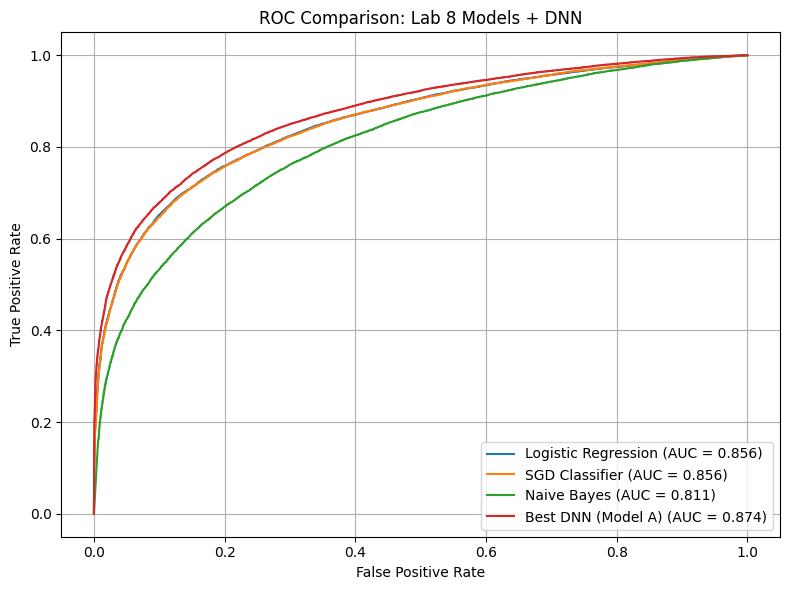

In [8]:
# Exercise 4: Compare Lab 8 models + best DNN model from Exercise 3

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 1. Load data
VarNames = ["signal", "l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi",
            "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2",
            "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv("SUSY.csv", names=VarNames)

# 2. Prepare train/test split
N_Max = 550000
N_Train = 500000
Train = df[:N_Train]
Test = df[N_Train:N_Max]

AllNames = VarNames[1:]
scaler = StandardScaler()
X_train = scaler.fit_transform(Train[AllNames])
X_test = scaler.transform(Test[AllNames])
y_train = Train["signal"].values
y_test = Test["signal"].values

# 3. Best DNN model from Exercise 3 (Model A)
def build_model_A(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_dim,)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

model_A = build_model_A(X_train.shape[1])
model_A.fit(X_train, y_train, epochs=10, batch_size=512, verbose=0)

# 4. Scikit-learn classifiers from Lab 8
models = [
    (LogisticRegression(max_iter=1000), "Logistic Regression"),
    (SGDClassifier(loss='log_loss', max_iter=1000, random_state=42), "SGD Classifier"),
    (GaussianNB(), "Naive Bayes")
]

def evaluate_classifier(model, X_train, X_test, y_train, y_test, label=""):
    model.fit(X_train, y_train)
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        y_score = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score, label

# 5. Evaluate traditional classifiers
results = []
for clf, label in models:
    fpr, tpr, auc_score, name = evaluate_classifier(clf, X_train, X_test, y_train, y_test, label)
    results.append((fpr, tpr, auc_score, name))

# 6. Evaluate DNN
y_score_dnn = model_A.predict(X_test).ravel()
fpr_dnn, tpr_dnn, _ = roc_curve(y_test, y_score_dnn)
auc_dnn = auc(fpr_dnn, tpr_dnn)
results.append((fpr_dnn, tpr_dnn, auc_dnn, "Best DNN (Model A)"))

# 7. Plot ROC comparison
plt.figure(figsize=(8, 6))
for fpr, tpr, auc_score, label in results:
    plt.plot(fpr, tpr, label=f"{label} (AUC = {auc_score:.3f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Comparison: Lab 8 Models + DNN")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#Exercise 4 – Comparing Traditional Models vs DNN
Finally, I revisited the classifiers from Lab 8 (Logistic Regression, SGD Classifier, and Naive Bayes) and compared them against my best DNN model from earlier.

AUC scores:

- Logistic Regression: 0.856

- SGD Classifier: 0.856

- Naive Bayes: 0.811

- Best DNN: 0.874

###Reflection:
The DNN clearly outperformed all three traditional models. This shows the power of deep learning when given enough data and tuning. It was also interesting to see that Logistic Regression and SGD performed identically, probably because of their similar nature under the hood.



#Final Thoughts
This lab really helped me understand how model architecture and input design affect learning. I now feel more confident in using Keras to build and compare DNNs, and I’ve seen firsthand how important it is to look beyond just accuracy—metrics like AUC and visualizing ROC curves make a big difference in evaluating real model performance.